In [1]:
import pandas as pd
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
f = open('quandlApiKey.txt','r',-1,"utf-8")
QUANDL_KEY = f.readline()
quandl.ApiConfig.api_key=QUANDL_KEY

df = quandl.get(dataset = 'WGC/GOLD_MONAVG_USD', start_date='2000-01-01',end_date='2011-12-31')

df.rename(columns={'Value':'price'},inplace=True)
df=df.resample('M').last()


<AxesSubplot:title={'center':'Gold Price'}, xlabel='Date'>

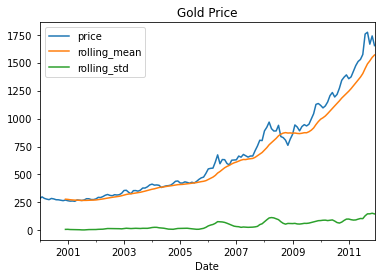

In [4]:
WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title='Gold Price')

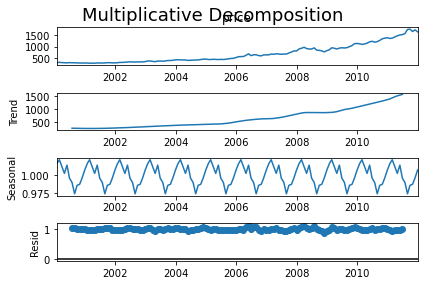

In [6]:
#승산적 모델을 사용해 계절성 분해를 수행
decomposition_results = seasonal_decompose(df.price,model = 'multiplicative')

decomposition_results.plot() \
            .suptitle('Multiplicative Decomposition',fontsize=18);

In [8]:
cerebro = bt.Cerebro(stdstats=False)
cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.add_signal(bt.SIGNAL_LONG,SmaSignal)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

In [9]:
print(f'Starting Portfolio Value : {cerebro.broker.getvalue():.2f}')
cerebro.run()
print(f'Final Portfolio Vlaue : {cerobro.broker.getvalue():.2f}')

Starting Portfolio Value : 1000.00


FileNotFoundError: [Errno 2] No such file or directory: 'AAPL'